In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

# Q1. 전국 시도별 약국수를 구해주세요!

- 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
- 다음의 결과가 나오도록 구합니다.

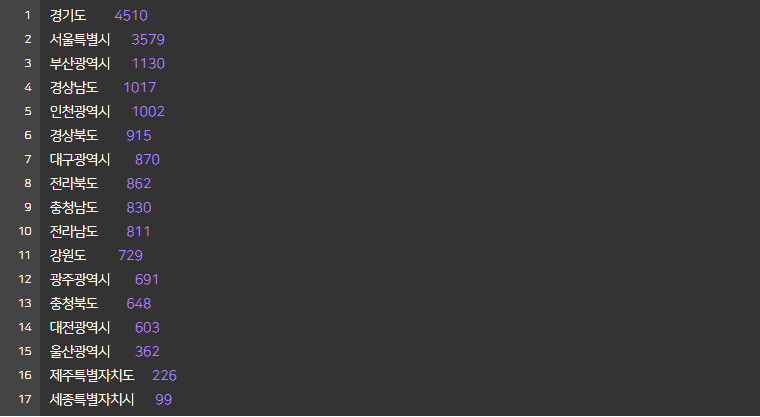

In [2]:
filter_q1 = df[df['상권업종소분류명'] == '약국'].copy()

In [3]:
filter_q1.value_counts('시도명')

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: count, dtype: int64

In [4]:
filter_q1.groupby('시도명').size().sort_values(ascending=False)

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
dtype: int64

In [5]:
pd.pivot_table(filter_q1, index='시도명', values='상호명', aggfunc='count')

,상호명
시도명,
강원도,729
경기도,4510
경상남도,1017
경상북도,915
광주광역시,691
대구광역시,870
대전광역시,603
부산광역시,1130
서울특별시,3579


# Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

- 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
- 다음의 결과가 나오도록 구합니다.

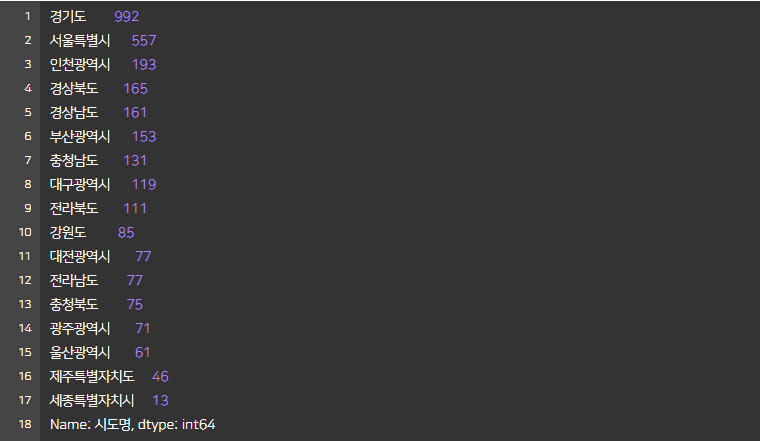

In [6]:
filter_q2 = df[df['상권업종소분류명'] == '동물병원'].copy()

<Axes: xlabel='시도명', ylabel='count'>

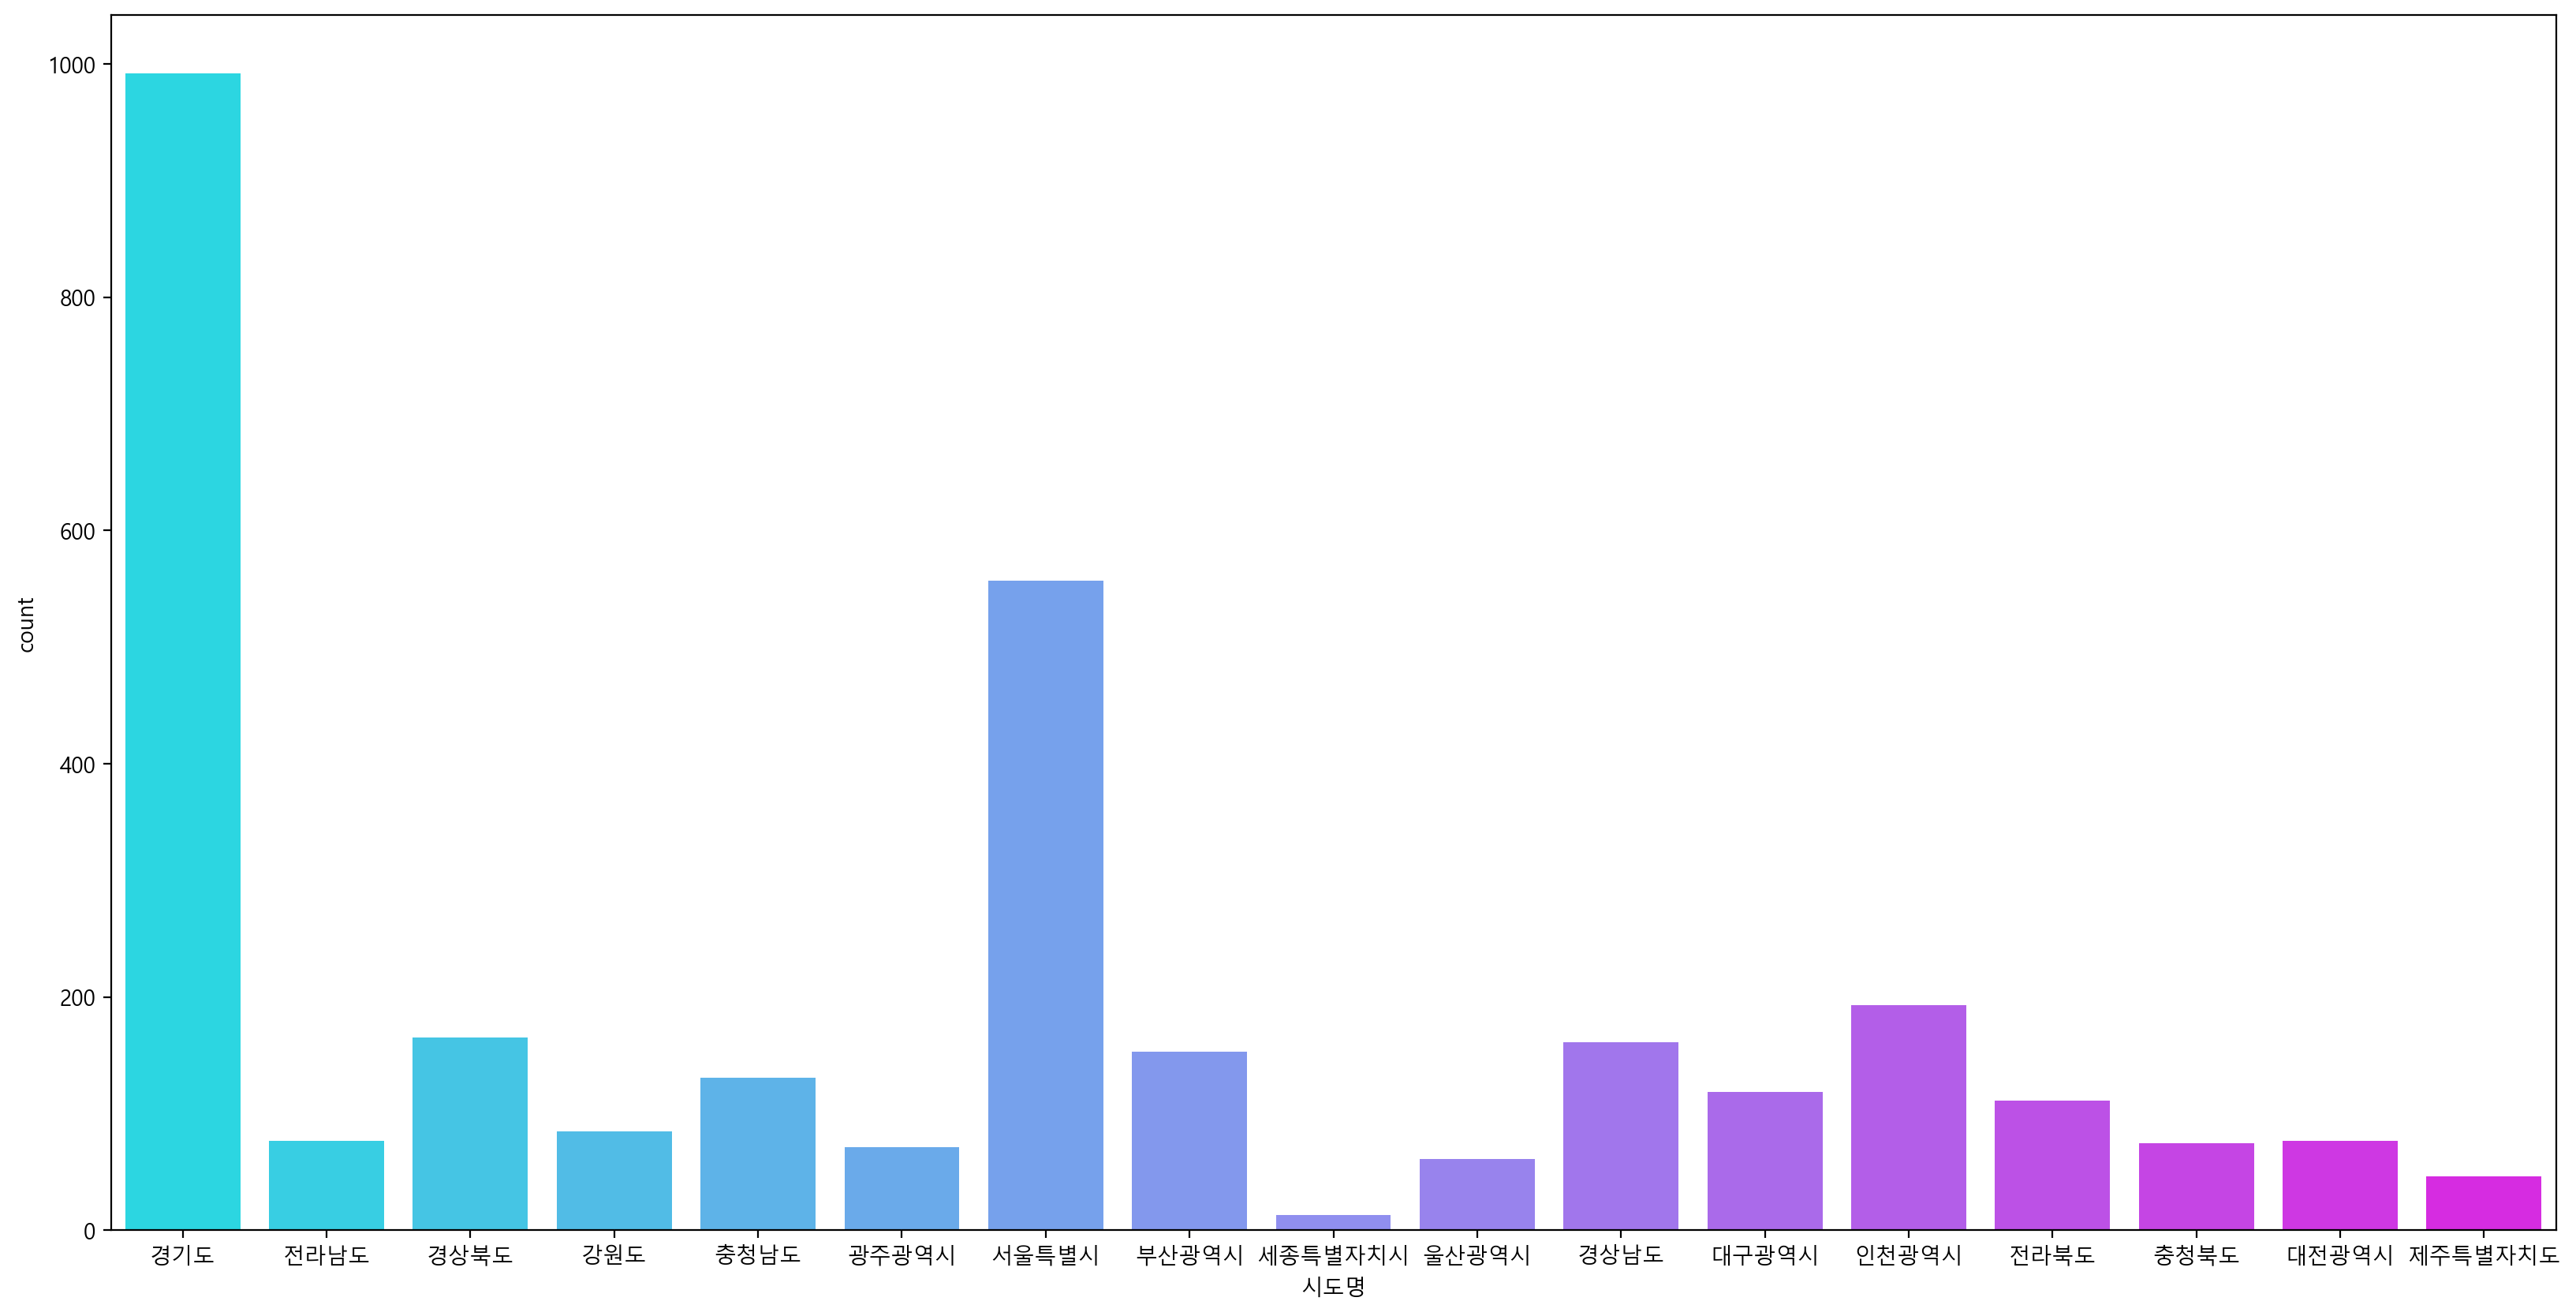

In [7]:
filter_q2.value_counts('시도명')

plt.figure(figsize=(20, 10))
sns.countplot(data=filter_q2, x='시도명', palette='cool')

# Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

- 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
- 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
- 비율이 높은 순서대로 정렬되게 구해주세요!
- 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
- 소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!
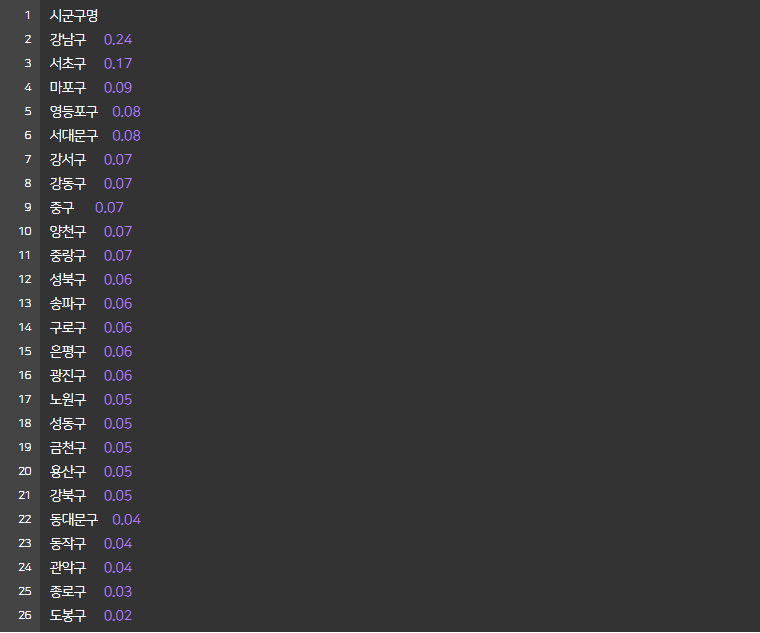

In [4]:
# 서울시 기준으로 색인, 피부 또는 성형이 들어간 업종으로 색인
seoul_hospitals = df[(df['시도명'] == '서울특별시')&(df["상권업종중분류명"] == "병원")].copy()
skin_hospital = seoul_hospitals[seoul_hospitals['상권업종소분류명'].str.contains('피부|성형')].copy()

# 전체 병원 수와 피부과 및 성형외과 병원 수 계산
total_count = seoul_hospitals['시군구명'].value_counts()
skin_count = skin_hospital['시군구명'].value_counts()

# 비율 계산
ratio = (skin_count / total_count).round(2)
ratio = ratio.sort_values(ascending=False)

ratio

시군구명
강남구     0.24
서초구     0.17
마포구     0.09
영등포구    0.08
서대문구    0.08
강서구     0.07
강동구     0.07
중구      0.07
양천구     0.07
중랑구     0.07
성북구     0.06
송파구     0.06
구로구     0.06
은평구     0.06
광진구     0.06
노원구     0.05
성동구     0.05
금천구     0.05
용산구     0.05
강북구     0.05
동대문구    0.04
동작구     0.04
관악구     0.04
종로구     0.03
도봉구     0.02
Name: count, dtype: float64

# Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

- folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
- 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
- folium 문서 : https://python-visualization.github.io/folium/quickstart.html

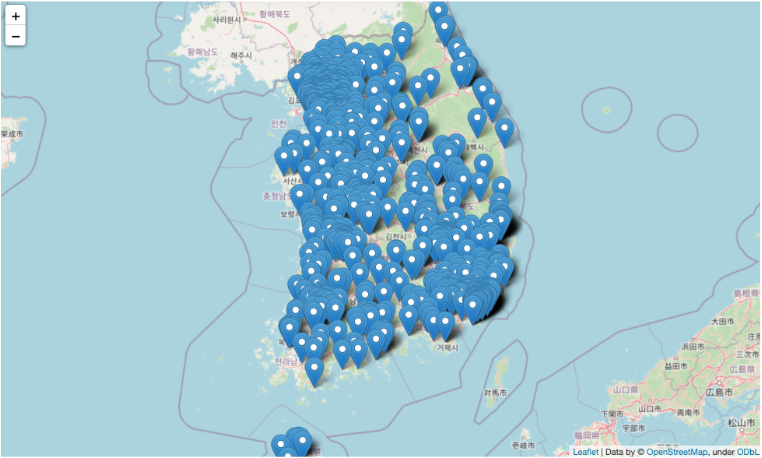

In [9]:
import folium

df_hospital = df[df['상권업종소분류명'] == '노인/치매병원'].copy()

map = folium.Map(location=[df_hospital['위도'].mean(), df_hospital['경도'].mean()],
           zoom_start=7)

color = {'blue', 'beige', 'lightblue', 'orange', 'lightred', 'white', 'darkgreen', 'lightgreen', 'red', 'black', 'cadetblue', 'lightgray', 'green', 'gray', 'darkblue', 'pink', 'darkpurple', 'purple', 'darkred'}

for n in df_hospital.index:
    html = """
    <h3>""" + df_hospital.loc[n, '상호명'] + """</h1><br>
    <p>
    """ + df_hospital.loc[n, '도로명주소'] + """
    </p>
    """
    popup = folium.Popup(html, max_width = 250)
    location = [df_hospital.loc[n, '위도'], df_hospital.loc[n, '경도']]
    
    folium.Marker(
        location = location,
        popup = popup,
        icon=folium.Icon(icon='flag'),
    ).add_to(map)
    
map